In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapfunction as mapf
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
wh = pd.read_csv('data_final/merged_all_final.csv')

In [3]:
wh_2015 = wh.loc[wh.year==2015]
wh_2016 = wh.loc[wh.year==2016]
wh_2017 = wh.loc[wh.year==2017]
wh_2018 = wh.loc[wh.year==2018]

In [4]:
wh.head()

,Country,Region,iso_a3,wh_score,gdi,gii,efs,pdn,year
0,Albania,Southern Europe,ALB,4.655,0.970,0.256,65.650034,105.135146,2015
1,Algeria,Northern Africa,DZA,6.355,0.858,0.442,48.881858,16.680253,2015
2,Angola,Sub-Saharan Africa,AGO,3.866,0.838,0.575,47.885804,22.366552,2015
3,Armenia,Western Asia,ARM,4.360,0.977,0.301,67.125092,102.759150,2015
4,Australia,Australia and New Zealand,AUS,7.313,0.975,0.110,81.387287,3.100113,2015


# <span style="color:red">Observation 1: Countries in Northern Europe have had the highest world Happiness Scores, while countries in Sub-Saharan Africa have had the lowest </span> 
# <span style="color:red">Observation 2: Singapore has had both the highest econmic freedom as well as the highest population density for the past 4 years</span>
# <span style="color:red">Observation 3: There is a much broader range of population density and economic freedom score than there are of happiness, gender development, and gender inequality scores</span>

#### Question: What is the min, max and range of each variable?

In [5]:
wh.describe()

,wh_score,gdi,gii,efs,pdn,year
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.462885,0.940172,0.342447,62.197024,209.427284,2016.510949
std,1.115995,0.085188,0.193097,9.884574,704.157751,1.119002
min,2.693000,0.270000,0.037000,25.200000,1.930044,2015.000000
25%,4.559225,0.913000,0.155250,54.762404,32.187782,2016.000000
50%,5.427650,0.966000,0.357500,61.989253,82.397530,2017.000000
75%,6.294925,0.987000,0.494250,69.222500,149.177893,2018.000000
max,7.768900,1.045000,0.841000,89.351544,7952.998418,2018.000000


In [6]:
features = ['wh_score', 'gdi', 'gii', 'efs', 'pdn']
dfs = [wh_2015, wh_2016, wh_2017, wh_2018]

In [7]:
def get_max_min(feature):
    print('Minimum '+ feature + ' score by year:',
          wh[['Country','Region',feature, 'year']].loc[wh.groupby('year')[feature].idxmin()],sep='\n')
    print('\n')
    print ('Maximum '+ feature + ' score by year:', 
           wh[['Country','Region',feature, 'year']].loc[wh.groupby('year')[feature].idxmax()],sep='\n')
    print('\n')

In [8]:
for feature in features:
    get_max_min(feature)

Minimum wh_score score by year:
                      Country              Region  wh_score  year
20                    Burundi  Sub-Saharan Africa    2.9050  2015
160  Central African Republic  Sub-Saharan Africa    2.6930  2016
294                   Burundi  Sub-Saharan Africa    2.9045  2017
433  Central African Republic  Sub-Saharan Africa    3.0830  2018


Maximum wh_score score by year:
     Country           Region  wh_score  year
34   Denmark  Northern Europe    7.5260  2015
229   Norway  Northern Europe    7.5370  2016
315  Finland  Northern Europe    7.6321  2017
451  Finland  Northern Europe    7.7689  2018


Minimum gdi score by year:
    Country              Region    gdi  year
89    Niger  Sub-Saharan Africa  0.270  2015
228   Niger  Sub-Saharan Africa  0.279  2016
365   Niger  Sub-Saharan Africa  0.289  2017
503   Niger  Sub-Saharan Africa  0.298  2018


Maximum gdi score by year:
    Country        Region    gdi  year
98    Qatar  Western Asia  1.043  2015
237   Qatar  

In [9]:
def get_range(feature):
    print(feature + ' Score range:', round((wh[feature].max()- wh[feature].min()),3))

In [10]:
for feature in features:
    get_range(feature)

wh_score Score range: 5.076
gdi Score range: 0.775
gii Score range: 0.804
efs Score range: 64.152
pdn Score range: 7951.068


# <span style="color:red">Observation 1: The margin of the top 3 countrie's world happiness scores is very slim</span>
# <span style="color:red">Observation 2: For all of the features, many of the countries in the top 10 and bottom 10 are present year over year</span>

#### Question: What are the top ten scores and bottom 10 scores of each year/feature?

In [22]:
def top_bottom(df, feature):
    ax = df[['Country',feature]].sort_values(feature).tail(10).plot(kind='barh',x='Country',y=feature,xlim=(0,df[feature].max()), figsize=(10,5))
    ax.get_legend().remove()
    ax.set_title(str(df.year.unique()[0]) + ' Top 10 ' + feature + ' Scores')

    ax = df[['Country',feature]].sort_values(feature).head(10).plot(kind='barh',x='Country',y=feature,xlim=(0,df[feature].max()), figsize=(10,5))
    ax.get_legend().remove()
    ax.set_title(str(df.year.unique()[0]) + ' Bottom 10 ' + feature + ' Scores')

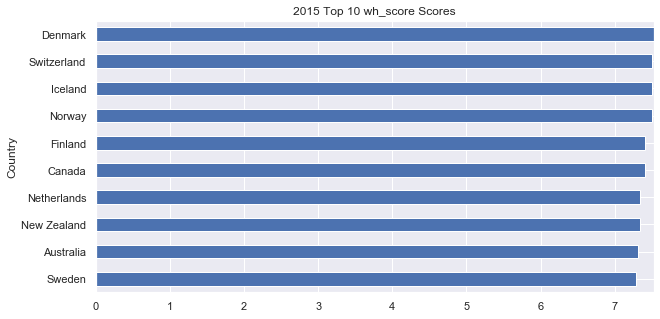

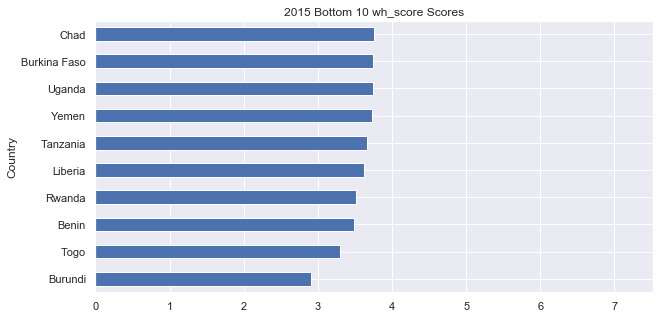

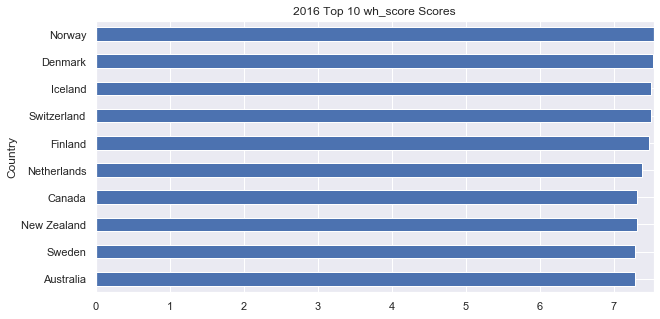

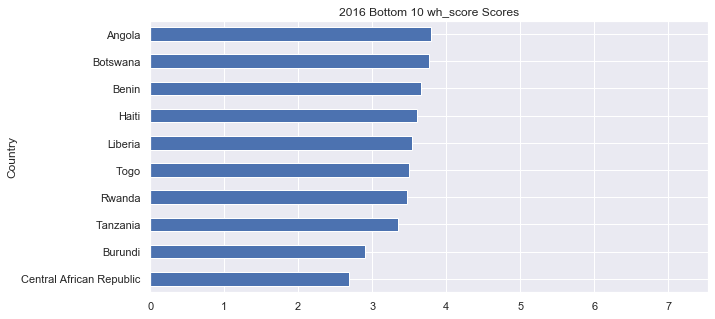

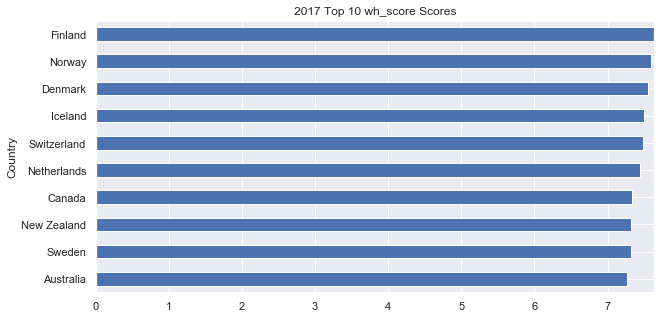

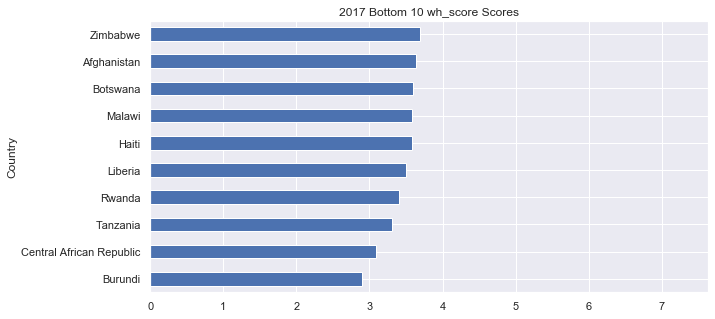

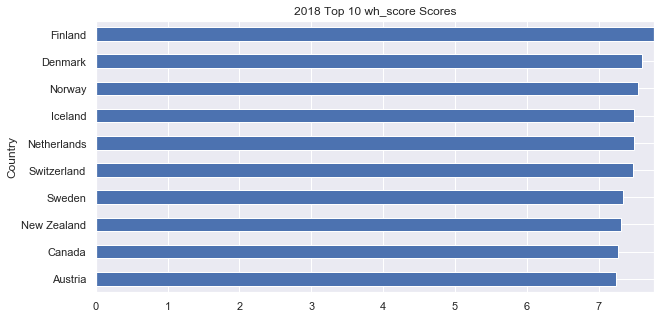

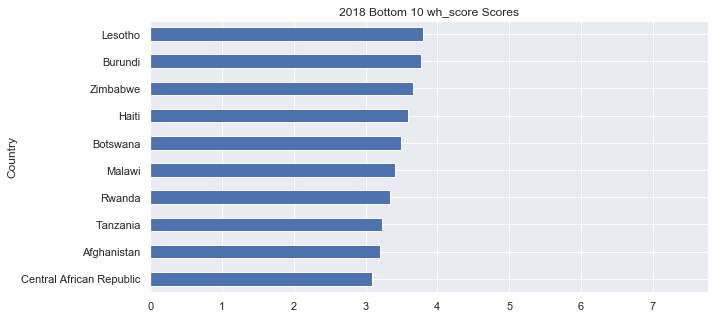

In [23]:
for df in dfs:
    top_bottom(df, 'wh_score')

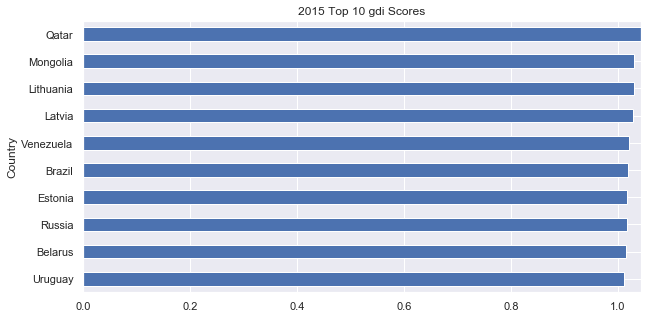

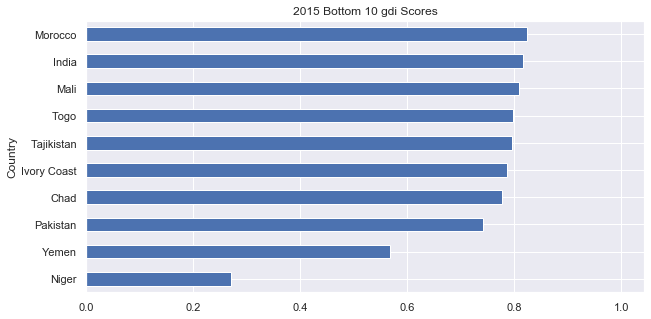

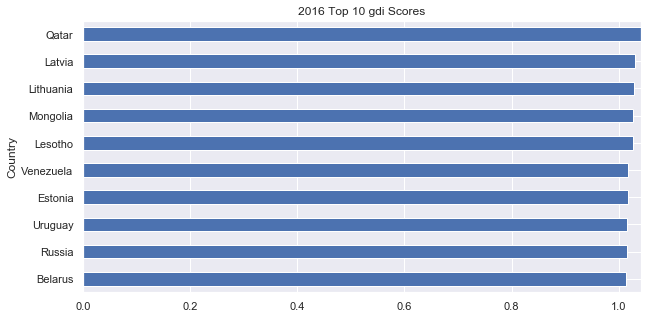

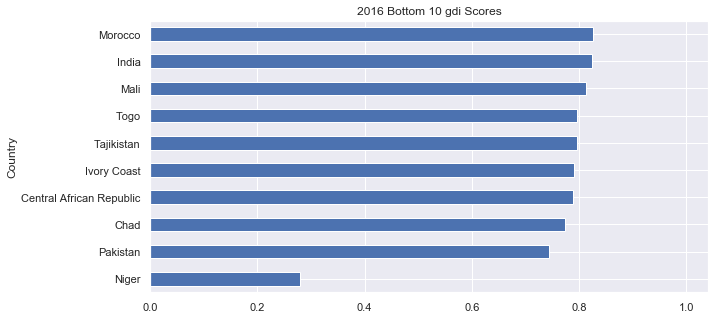

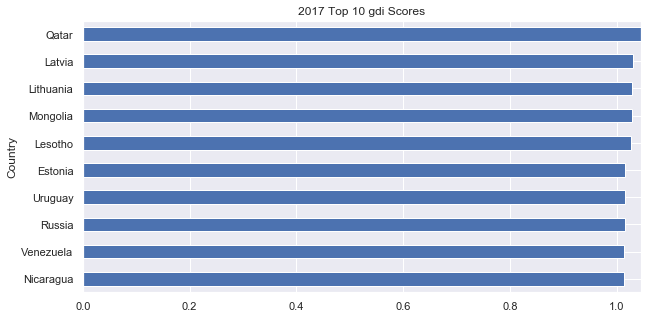

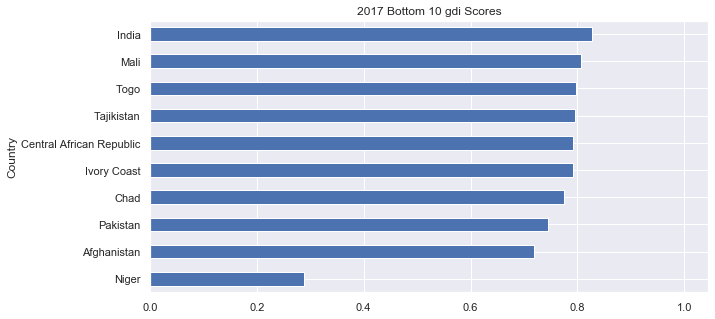

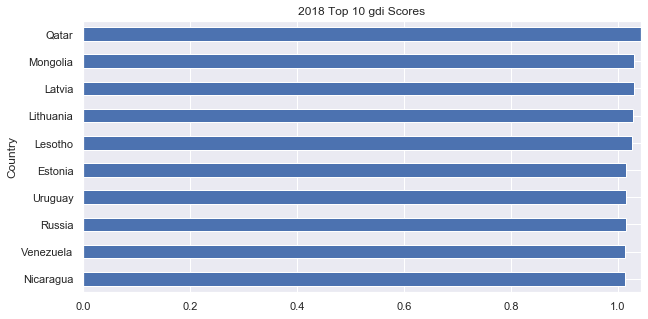

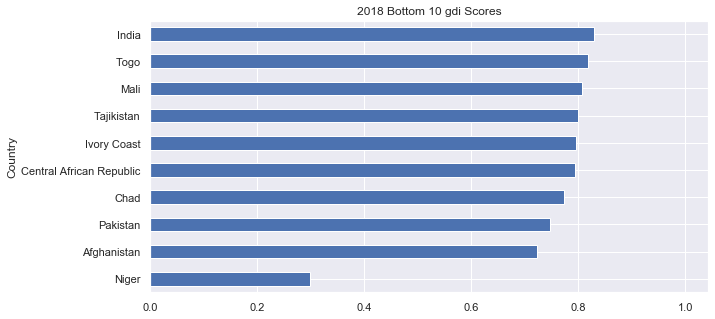

In [14]:
for df in dfs:
    top_bottom(df, 'gdi')

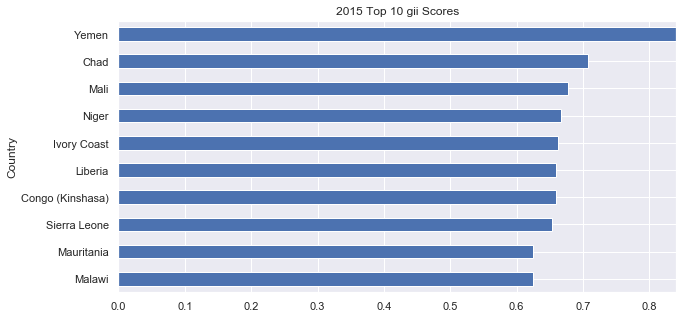

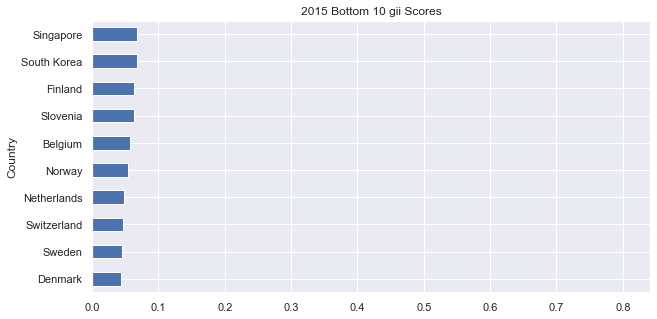

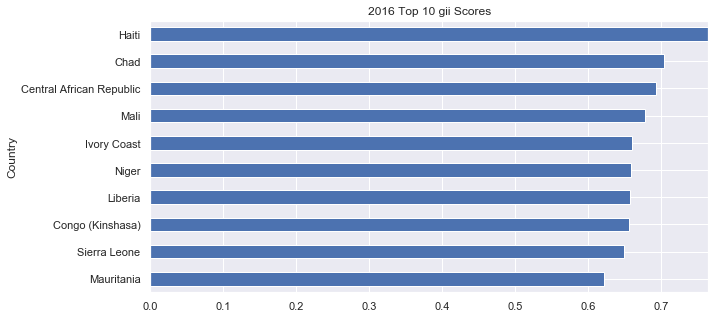

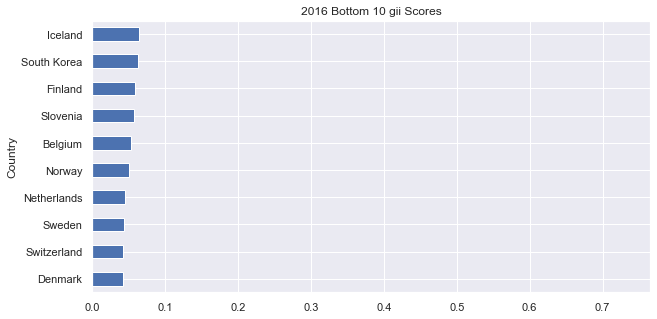

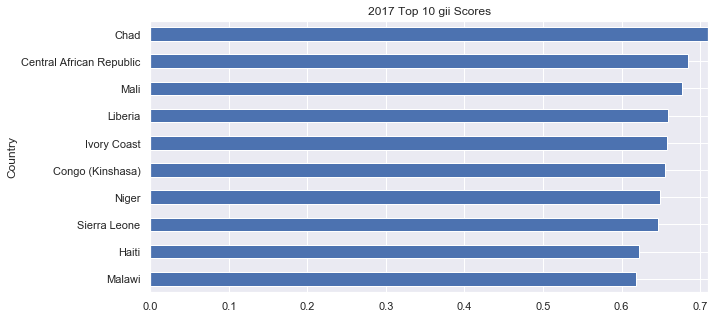

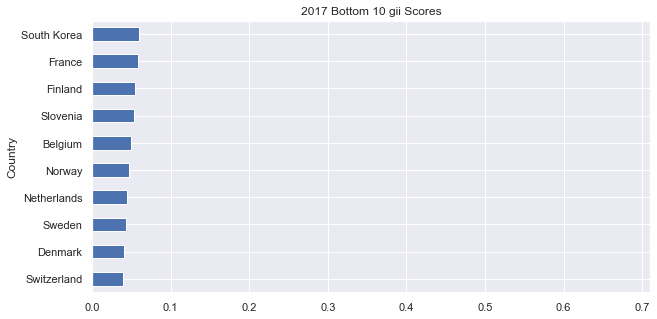

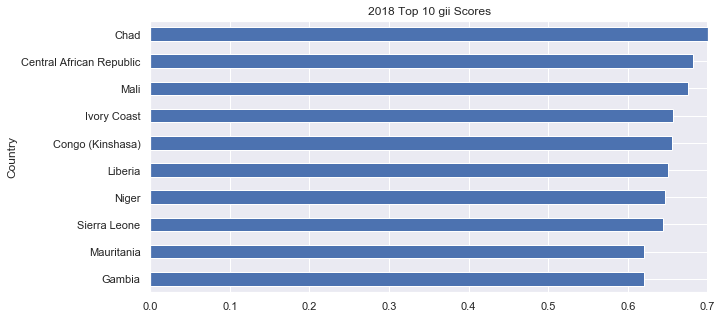

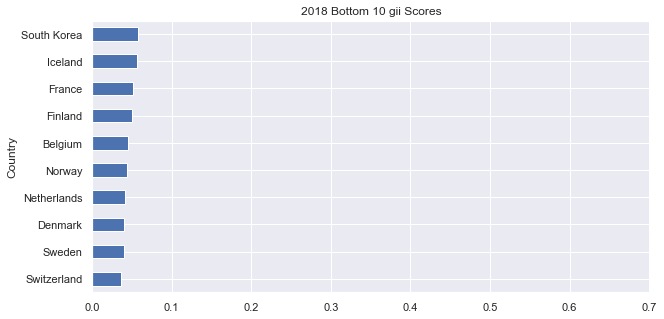

In [15]:
for df in dfs:
    top_bottom(df, 'gii')

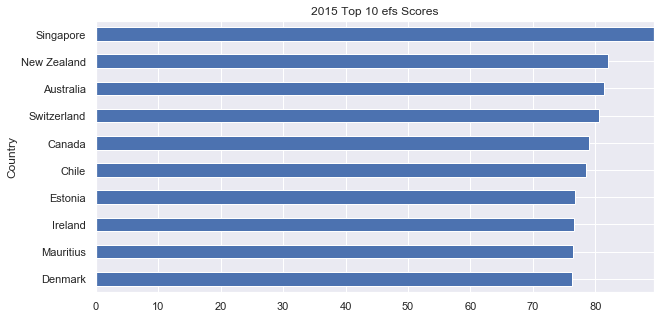

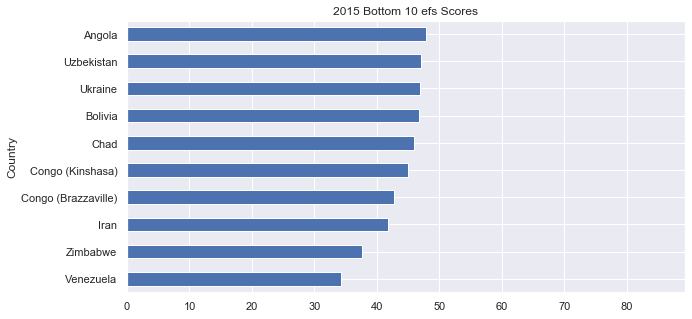

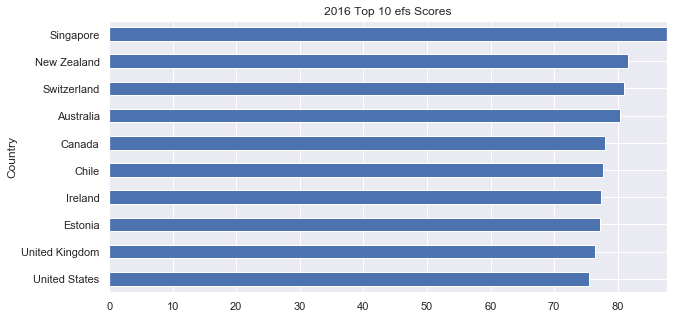

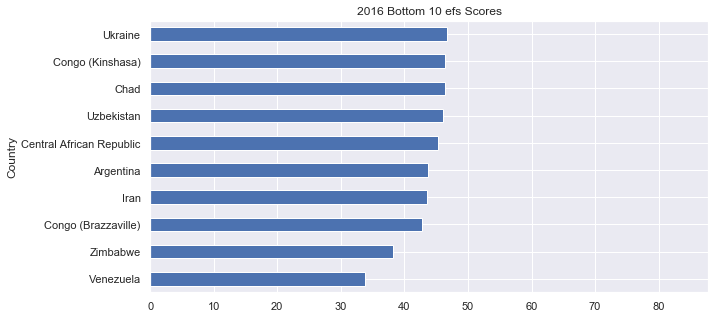

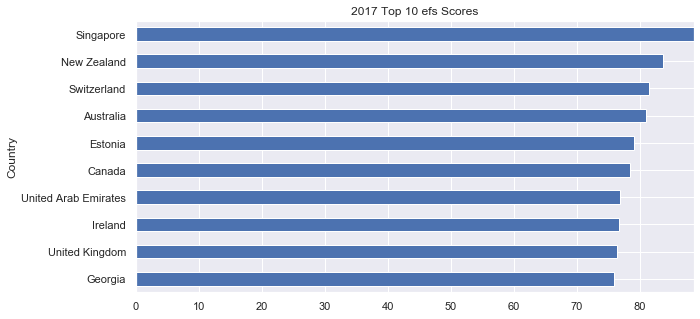

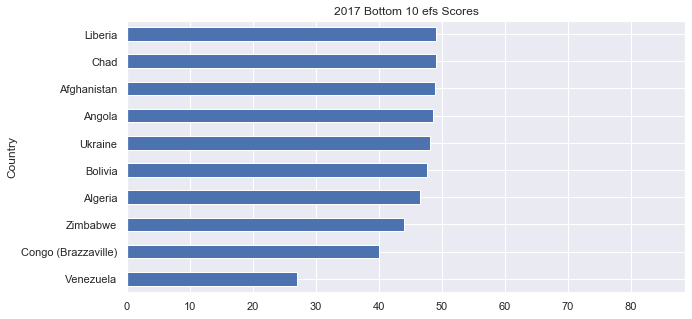

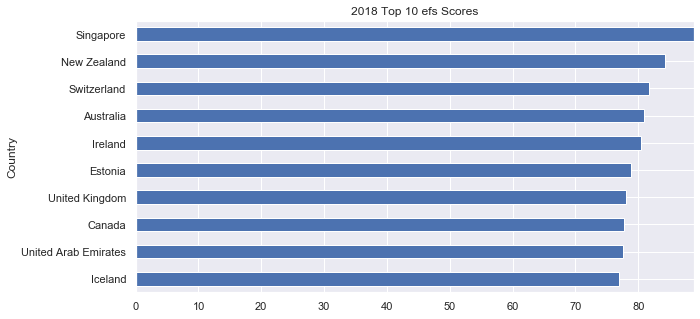

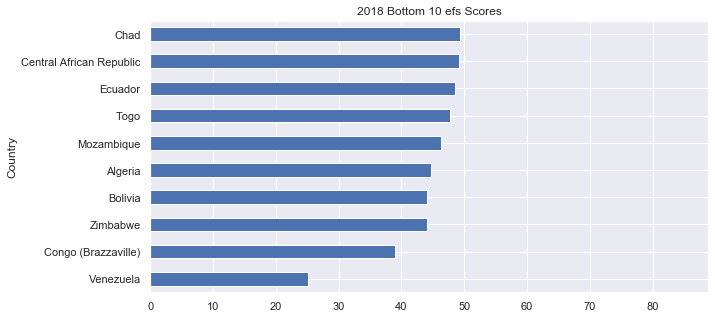

In [16]:
for df in dfs:
    top_bottom(df, 'efs')

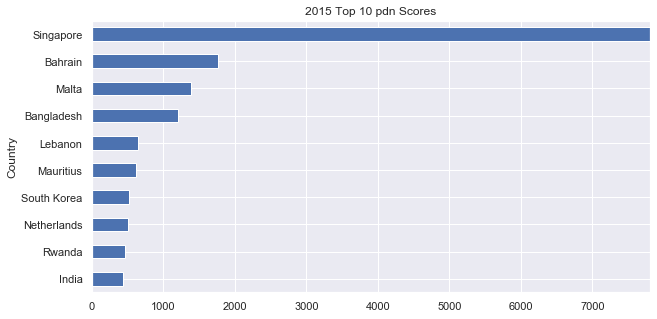

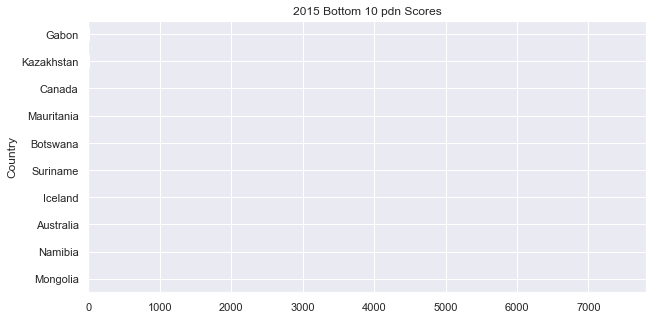

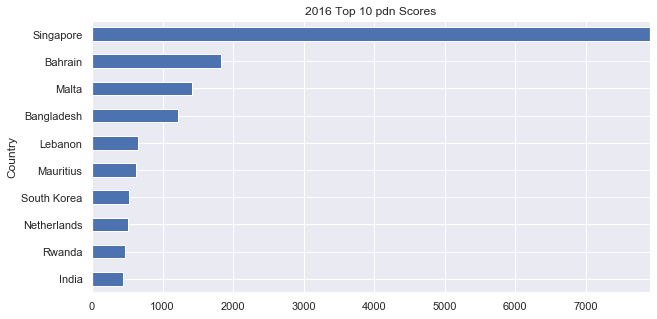

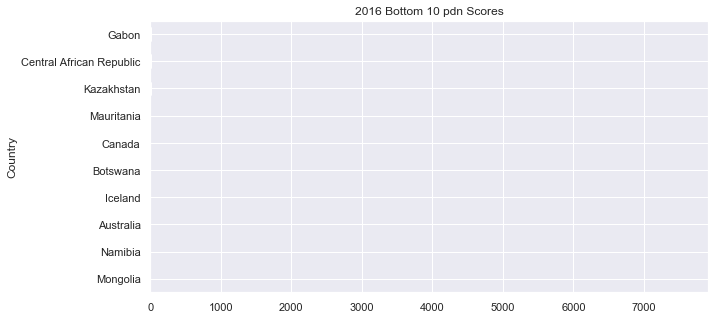

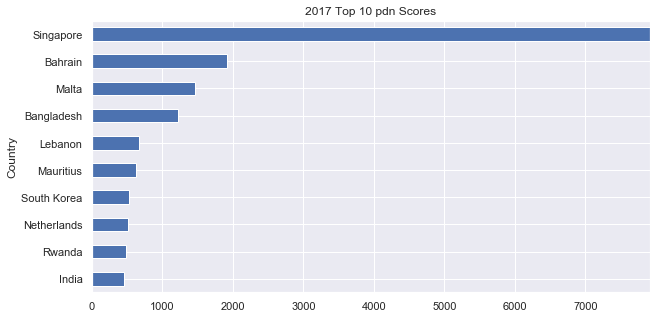

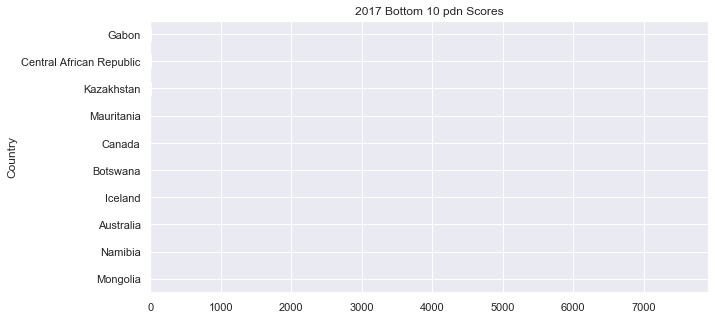

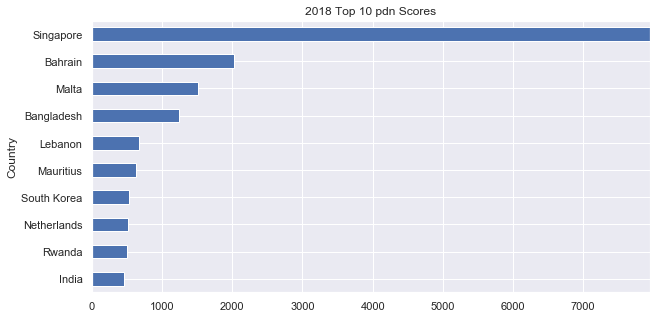

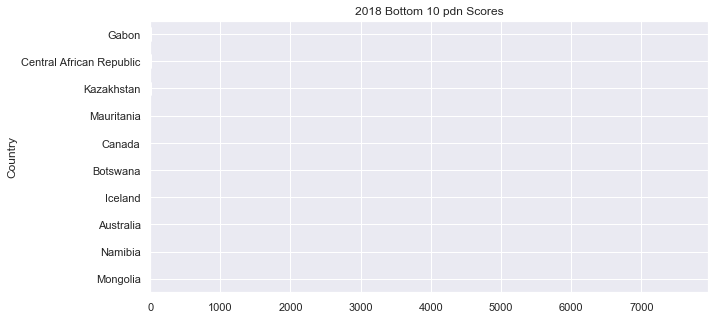

In [17]:
for df in dfs:
    top_bottom(df, 'pdn')

# <span style="color:red">Observation 1:The top four regoins for world happiness are also the top four regoins for economic freedom</span>
# <span style="color:red">Observation 2: The bottom 3 regions for world happiness and gender development are also the highest for gender inequality</span>
# <span style="color:red">Observation 3: The regions with the lowest population density have the highest world happiness scores</span>

#### Question: What are the average scores by region?

In [47]:
def graph_by_region(score):
    print(wh[['Region',score]].groupby('Region').mean().sort_values(score, ascending=False))
    wh[['Region',score]].groupby('Region').mean().sort_values(score).plot(kind='barh', title=score)
    plt.legend().remove()

                                 wh_score
Region                                   
Australia and New Zealand        7.297050
Northern America                 7.150238
Western Europe                   7.050929
Northern Europe                  6.873605
Latin America and the Caribbean  5.973992
Western Asia                     5.688668
Eastern Europe                   5.618243
Central Asia                     5.562650
Southern Europe                  5.551485
Eastern Asia                     5.519462
South-eastern Asia               5.460845
Northern Africa                  5.053560
Southern Asia                    4.662097
Sub-Saharan Africa               4.176589


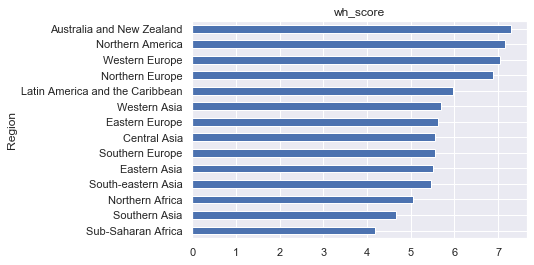

In [51]:
graph_by_region('wh_score')

                                      gdi
Region                                   
Eastern Europe                   0.998100
Northern Europe                  0.992950
Northern America                 0.991125
Latin America and the Caribbean  0.976624
Eastern Asia                     0.973937
Western Europe                   0.969964
South-eastern Asia               0.968806
Australia and New Zealand        0.968750
Southern Europe                  0.968542
Western Asia                     0.942302
Central Asia                     0.924250
Sub-Saharan Africa               0.878685
Northern Africa                  0.865400
Southern Asia                    0.855833


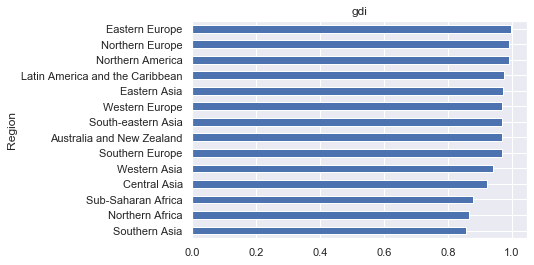

In [52]:
graph_by_region('gdi')

                                      gii
Region                                   
Sub-Saharan Africa               0.567646
Southern Asia                    0.501400
Northern Africa                  0.420200
Latin America and the Caribbean  0.416824
South-eastern Asia               0.356290
Central Asia                     0.319437
Western Asia                     0.287170
Eastern Europe                   0.220200
Eastern Asia                     0.163125
Northern America                 0.149500
Southern Europe                  0.137063
Australia and New Zealand        0.125250
Northern Europe                  0.093950
Western Europe                   0.062964


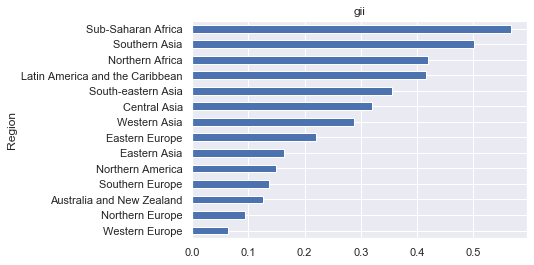

In [53]:
score_by_region('gii')

                                       efs
Region                                    
Australia and New Zealand        81.902000
Northern America                 76.961924
Northern Europe                  74.997113
Western Europe                   72.569357
Western Asia                     66.993637
South-eastern Asia               64.780512
Eastern Asia                     64.287028
Southern Europe                  62.909647
Eastern Europe                   62.405681
Latin America and the Caribbean  59.757644
Central Asia                     57.951062
Sub-Saharan Africa               55.548286
Northern Africa                  55.123879
Southern Asia                    54.104597


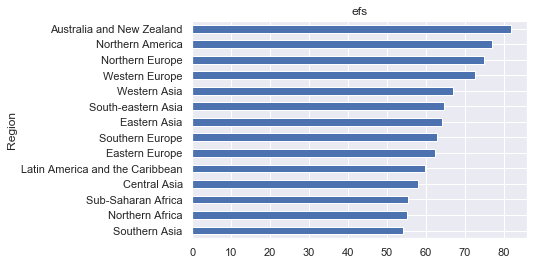

In [54]:
score_by_region('efs')

                                         pdn
Region                                      
South-eastern Asia               1166.021726
Southern Asia                     341.790253
Western Asia                      315.690118
Western Europe                    257.301743
Eastern Asia                      255.973654
Southern Europe                   208.239772
Latin America and the Caribbean   104.869421
Sub-Saharan Africa                102.774960
Eastern Europe                     88.999182
Northern Africa                    64.602230
Northern Europe                    64.577972
Central Asia                       44.342388
Northern America                   19.710505
Australia and New Zealand          10.591305


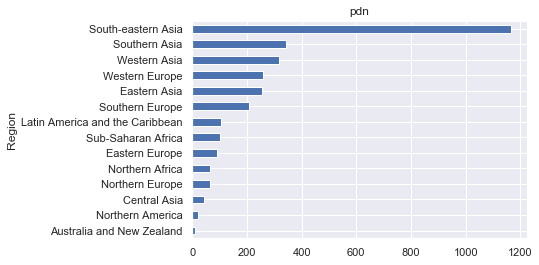

In [55]:
score_by_region('pdn')